<a href="https://colab.research.google.com/github/Prachiti-Chavan/PrachitiChavan_Project/blob/main/E_commerce_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Amazon Sale Report.csv")

<ipython-input-9-0900b0ca6c44>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Amazon Sale Report.csv")


In [15]:
print(df.dtypes)

index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
Month                  object
dtype: object


In [16]:
# For a more detailed view, consider using display from IPython:
from IPython.display import display
display(df.head())
# Shows the first few rows with data types

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22,Month
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN,April
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN,April
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN,April
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN,April
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN,April


<ipython-input-10-d2c125ec7ba7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Month'] = pd.to_datetime(df['Date']).dt.month_name()


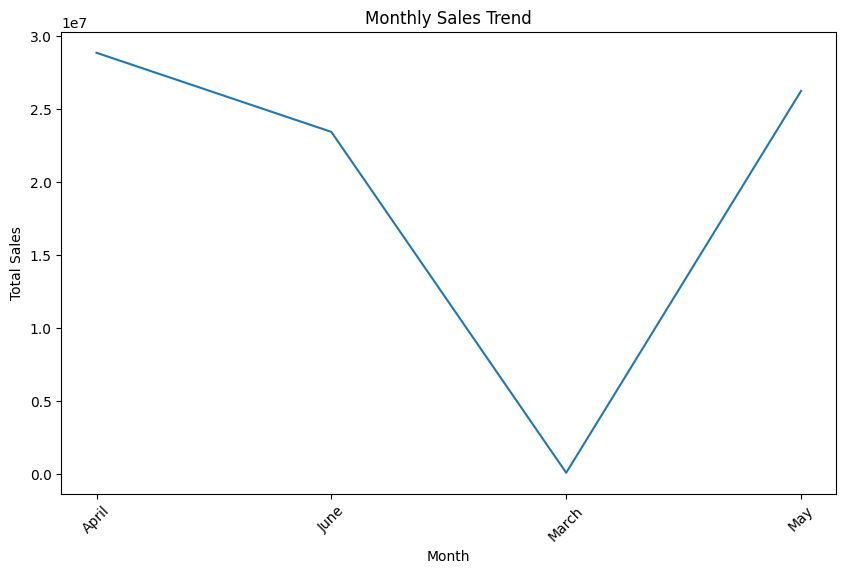

In [10]:
# 1. Sales Performance Over Time (Monthly)
df['Month'] = pd.to_datetime(df['Date']).dt.month_name()
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'], monthly_sales['Amount'])
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

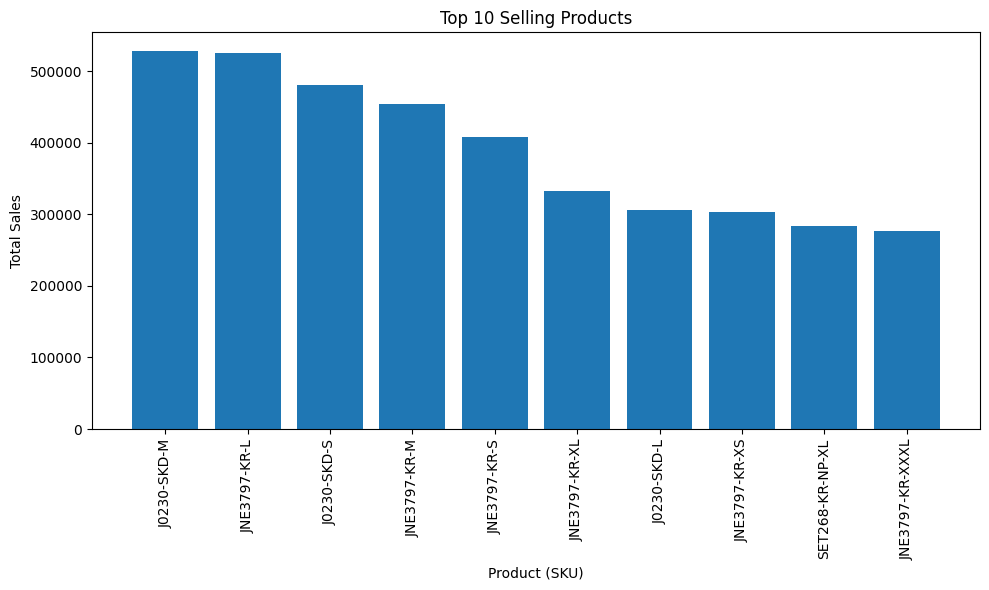

In [17]:
# 2. Top Selling Products/Categories
top_products = df.groupby('SKU')['Amount'].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(top_products['SKU'], top_products['Amount'])
plt.xlabel('Product (SKU)')  # Adjust label based on actual column name
plt.ylabel('Total Sales')
plt.title('Top 10 Selling Products')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [32]:
# 3. Profitability by category
# Get category counts
category_counts = df['Category'].value_counts()

# Calculate total number of products (adjust if rows were filtered)
total_products = len(df)

# Calculate probabilities
category_probs = category_counts / total_products
category_probs = category_probs / category_probs.sum()  # Normalize

# Print or display probabilities
print("Probability of Product Categories:")
print(category_probs)


Probability of Product Categories:
Category
Set              0.389874
kurta            0.386718
Western Dress    0.120178
Top              0.082357
Ethnic Dress     0.008986
Blouse           0.007180
Bottom           0.003412
Saree            0.001272
Dupatta          0.000023
Name: count, dtype: float64


In [25]:
#4.Promotion applied
df_promo_ff = df[df['promotion-ids'].isin(free_financing_ids)]


In [26]:
df_promo_ship = df[df['promotion-ids'] == "IN Core Free Shipping 2015/04/08 23-48-5-108"]


In [27]:
df_clean = df.dropna(subset=['promotion-ids'])  # Remove rows with missing promotion IDs (optional)

In [28]:
def categorize_promotion(row):
    promotion_id = row['promotion-ids']
    if pd.isna(promotion_id):  # Handle missing values (if applicable)
        return 'None'
    elif any(id in promotion_id for id in free_financing_ids):
        return 'Free Financing'
    elif promotion_id == "2.IN Core Free Shipping 2015/04/08 23-48-5-108":
        return 'Free Shipping'
    else:
        return 'Other'  # Category for unknown promotions (optional)

df_clean['Promotion'] = df_clean.apply(categorize_promotion, axis=1)


<ipython-input-28-a6c0933bfcbd>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Promotion'] = df_clean.apply(categorize_promotion, axis=1)


In [29]:
promotion_counts = df_clean['Promotion'].value_counts()


In [30]:
total_rows = len(df_clean)  # Adjust if you used filtering
promotion_probs = promotion_counts / total_rows
promotion_probs = promotion_probs / promotion_probs.sum()


In [31]:
print(promotion_probs)


Promotion
Other             0.604508
Free Financing    0.395492
Name: count, dtype: float64
